In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

Load the dataset

In [47]:
df = pd.read_csv('Churn_Modelling.csv')

In [46]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OHC_Code
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


Visualization

Univariate Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


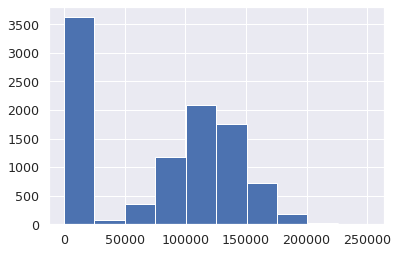

In [45]:
plt.hist(df['Balance'])
plt.show()

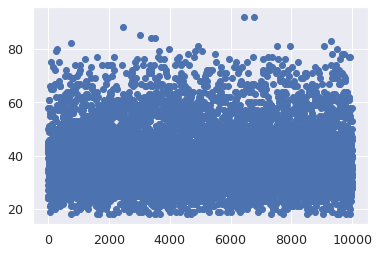

In [48]:
plt.scatter(df.index, df['Age'])
plt.show()

Bivariate Analysis

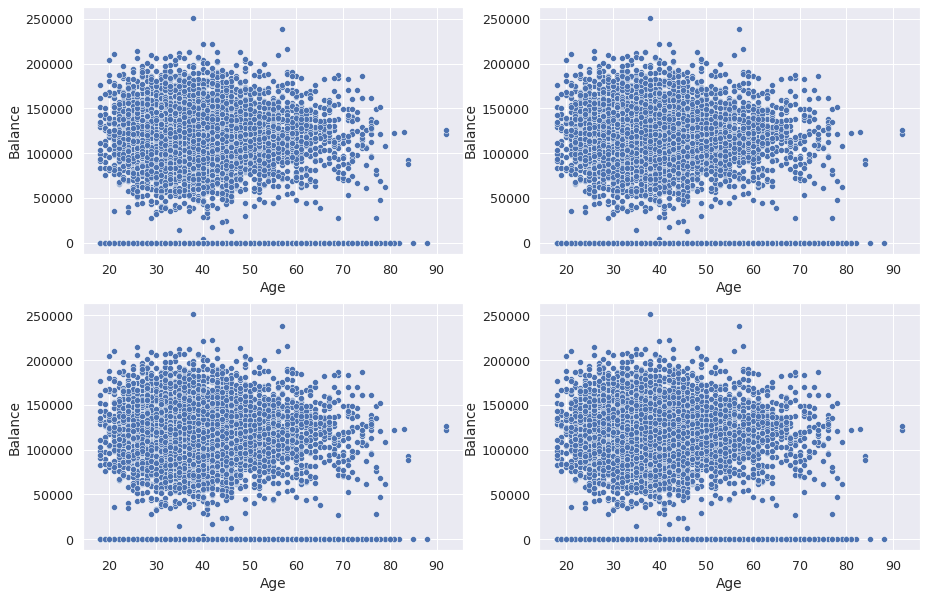

In [49]:
fig, axis=plt.subplots(2,2,figsize=(15,10))
#direct bilirubin shows positive correlation with total bilirubin
sns.scatterplot(x='Age', y='Balance', data=df, ax=axis[0,0])
sns.scatterplot(x='Age', y='Balance', data=df, ax=axis[0,1])
sns.scatterplot(x='Age', y='Balance', data=df, ax=axis[1,0])
sns.scatterplot(x='Age', y='Balance', data=df, ax=axis[1,1])
#linear positive correlation with coefficient as r=0.7

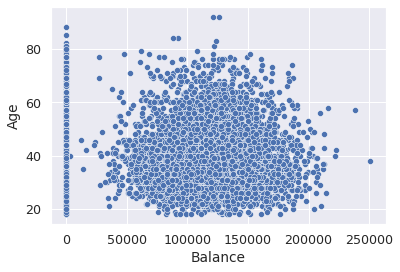

In [50]:
sns.scatterplot(x='Balance', y='Age', data=df)

Estimated coefficients:
b_0 = 101627.15792176241 \nb_1 = -39.48733205459166


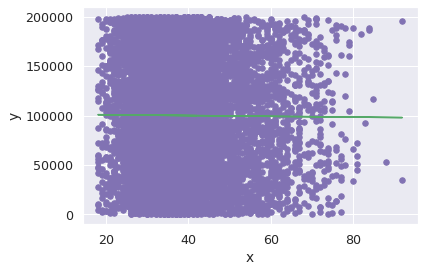

In [52]:
def estimate_coef(x, y):
  n = np.size(x)
  m_x = np.mean(x)
  m_y = np.mean(y)
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
  return (b_0, b_1)
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",marker = "o", s = 30)
  # predicted response vector
  y_pred = b[0] + b[1]*x
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
def main():
  x = df['Age']
  y = df['EstimatedSalary']
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \\nb_1 = {}".format(b[0], b[1]))
  plot_regression_line(x, y, b)
if __name__ == "__main__":
  main()

In [53]:
#Chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df['EstimatedSalary'])
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Multivariate Analysis

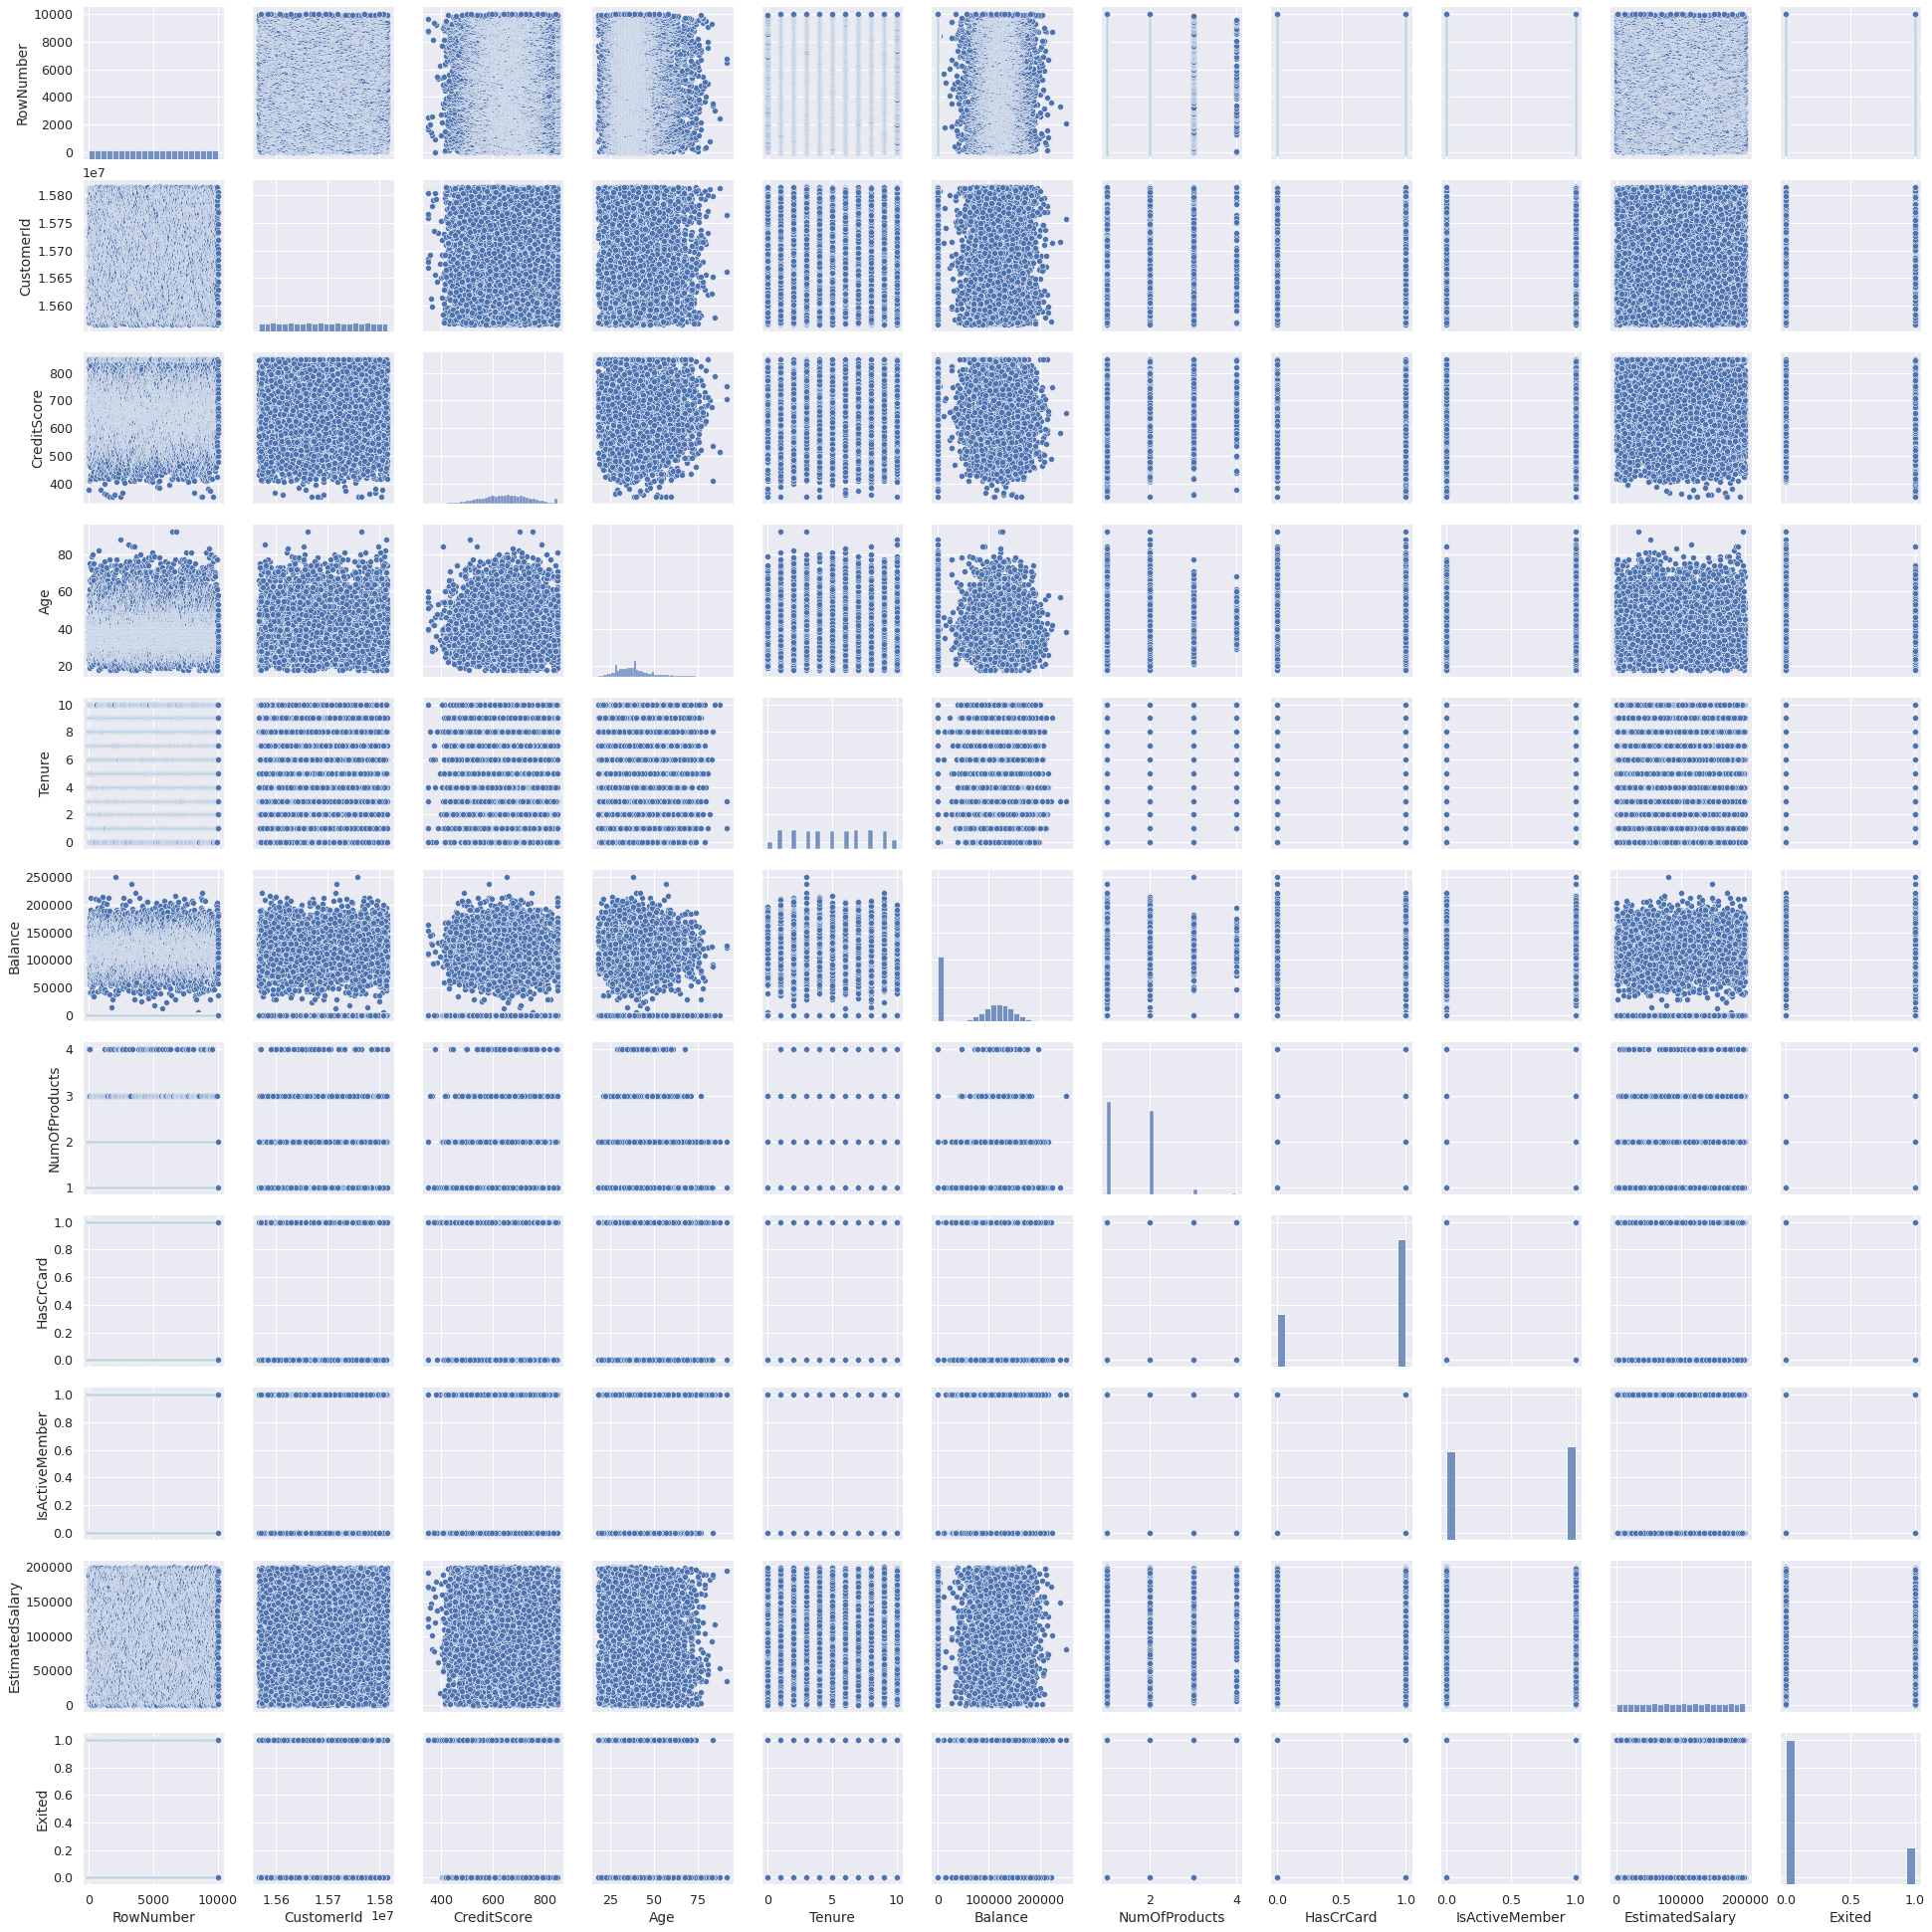

In [54]:
sns.pairplot(df);

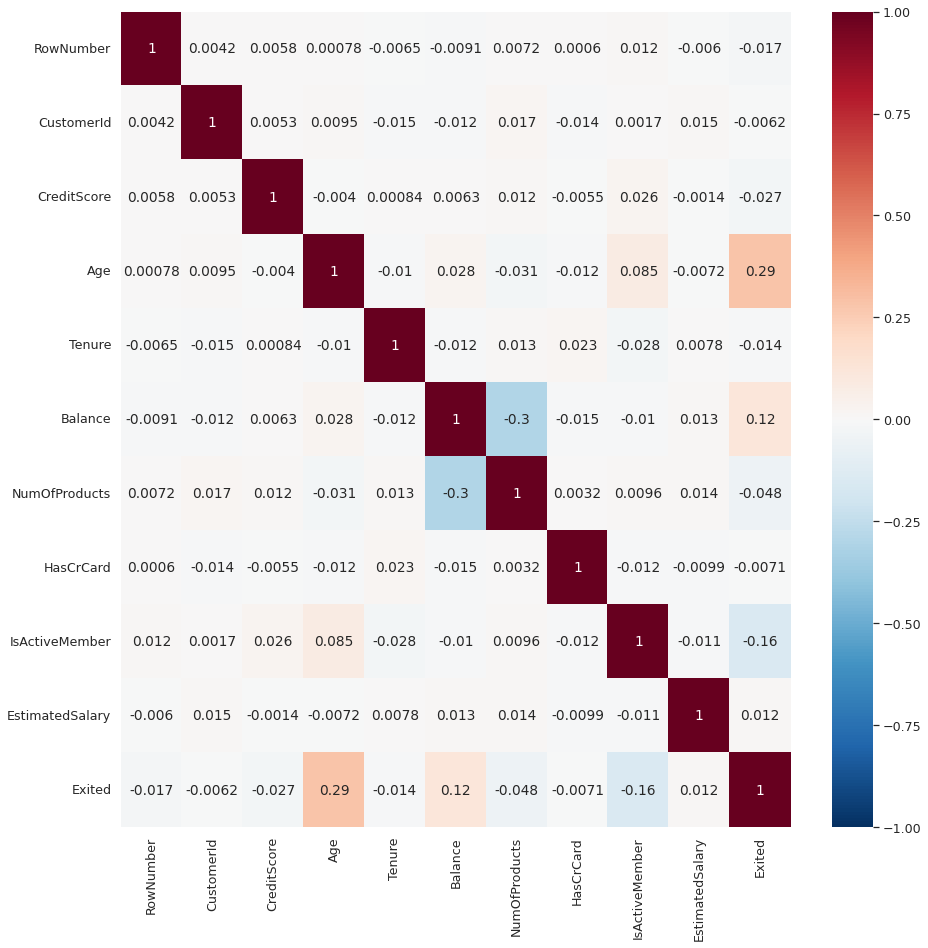

In [55]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1);

Descriptive Analysis

In [56]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [57]:
df['Age'].sum()

389218

In [58]:
df['Age'].cumsum()

0           42
1           83
2          125
3          164
4          207
         ...  
9995    389077
9996    389112
9997    389148
9998    389190
9999    389218
Name: Age, Length: 10000, dtype: int64

In [59]:
df['Age'].min()

18

In [38]:
df['Age'].max()

92

In [22]:
df['EstimatedSalary'].abs()

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [60]:
df['EstimatedSalary'].prod()

inf

In [61]:
df['EstimatedSalary'].cumprod()

0       1.013489e+05
1       1.140606e+10
2       1.299511e+15
3       1.219287e+20
4       9.642623e+24
            ...     
9995             inf
9996             inf
9997             inf
9998             inf
9999             inf
Name: EstimatedSalary, Length: 10000, dtype: float64

Handling missing values

In [62]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Find and replace outliers

In [63]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


Check for categorical values and perform encoding

In [65]:
df["OHC_Code"] = np.where(df["Gender"].str.contains("ohc"), 1, 0)

In [66]:
df[["Gender", "Balance"]].head()

,Gender,Balance
0,Female,0.00
1,Female,83807.86
2,Female,159660.80
3,Female,0.00
4,Female,125510.82


Split data into dependent and independent variables

In [67]:
X= df.iloc[:,:-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 101348.88 1]
 [2 15647311 'Hill' ... 1 112542.58 0]
 [3 15619304 'Onio' ... 0 113931.57 1]
 ...
 [9998 15584532 'Liu' ... 1 42085.58 1]
 [9999 15682355 'Sabbatini' ... 0 92888.52 1]
 [10000 15628319 'Walker' ... 0 38190.78 0]]


In [68]:
Y = df.iloc[:, 10].values
print(Y)

[1 0 1 ... 0 1 1]


Scale independent variables

In [69]:
#MinMax Scaling
x = df['Balance']
y = x-min(x)/(max(x)-min(x))
print(y)

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64


9) Split dataset into train and test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [33]:
print(X_test, y_test)

[[9395 15615753 'Upchurch' ... 1 192852.67 0]
 [899 15654700 'Fallaci' ... 0 128702.1 1]
 [2399 15633877 'Morrison' ... 1 75732.25 0]
 ...
 [492 15699005 'Martin' ... 1 9983.88 0]
 [2022 15795519 'Vasiliev' ... 0 197322.13 0]
 [4300 15711991 'Chiawuotu' ... 0 3183.15 0]] [1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 